In [1]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_fake=pd.read_csv("Fake.csv")
df_real=pd.read_csv("True.csv")

In [3]:
df_fake["label"] = 0   # 0 for fake
df_real["label"] = 1   # 1 for true

In [4]:
df = pd.concat([df_fake, df_real], ignore_index=True)

In [5]:
df = df.sample(frac=1).reset_index(drop=True)

In [6]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [7]:
df.head()

,title,text,subject,date,label
0,Watch This Awesome Mashup of Michael Flynn Le...,Donald Trump s disgraced National Security Adv...,News,"December 1, 2017",0
1,Trump blasts CEOs who quit advisory panels as ...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"August 15, 2017",1
2,LAWYER FOR FBI INFORMANT: My Client Knows What...,The lawyer for the FBI informant under a gag o...,politics,"Oct 24, 2017",0
3,Security tight as Germany marks anniversary of...,BERLIN (Reuters) - Germany has tightened secur...,worldnews,"December 15, 2017",1
4,WOW! Watch Side By Side Comparison Of Hillary’...,This video is truly one of the best examples o...,left-news,"Aug 3, 2016",0


<Axes: title={'center': 'Class Distribution'}, xlabel='label'>

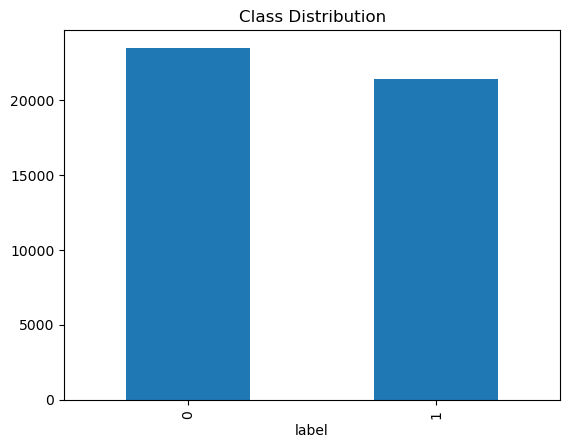

In [8]:
df['label'].value_counts().plot(kind='bar', title='Class Distribution')

<Axes: title={'center': 'Text Length Distribution'}, ylabel='Frequency'>

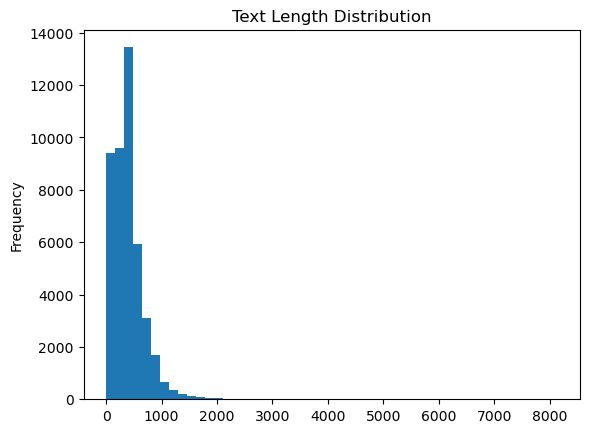

In [9]:
df['text_length'] = df['text'].apply(lambda x: len(x.split()))
df['text_length'].plot(kind='hist', bins=50, title='Text Length Distribution')

In [10]:
# Run this once to install WordCloud (only in notebooks)
!pip install wordcloud


In [11]:
%matplotlib inline

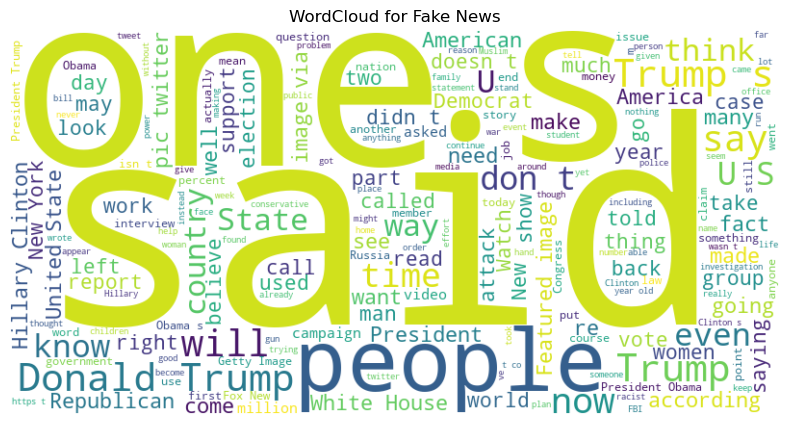

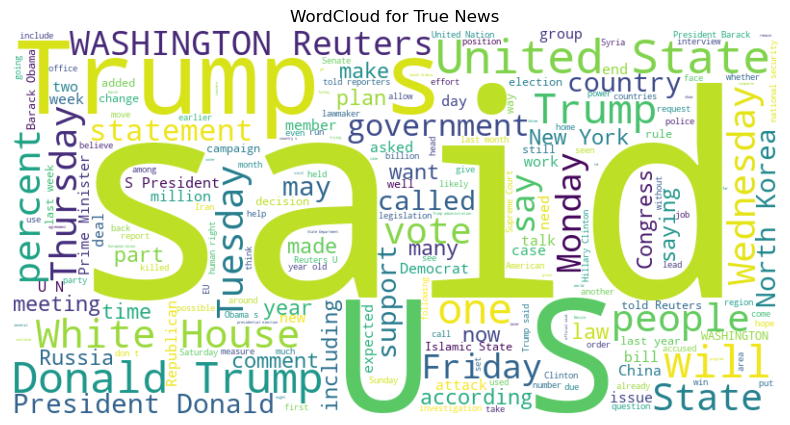

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_wordcloud(label):
    text = " ".join(df[df['label'] == label]['text'].values)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud for {'Fake' if label == 0 else 'True'} News")
    plt.show()

plot_wordcloud(0)
plot_wordcloud(1)

In [13]:
from collections import Counter
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
stop_words = set(stopwords.words('english'))

def get_top_words(label, n=20):
    text = " ".join(df[df['label'] == label]['text'].values).lower()
    words = [word for word in word_tokenize(text) if word.isalpha() and word not in stop_words]
    counter = Counter(words)
    return counter.most_common(n)

print("Top words in Fake News:\n", get_top_words(0))
print("Top words in Real News:\n", get_top_words(1))

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\praga\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\praga\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\praga\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Top words in Fake News:
 [('trump', 74241), ('said', 31149), ('people', 26015), ('president', 25772), ('would', 23461), ('one', 22995), ('clinton', 18085), ('obama', 17920), ('like', 17660), ('donald', 17235), ('also', 15243), ('new', 14198), ('news', 14198), ('us', 13922), ('even', 13691), ('hillary', 13673), ('white', 12797), ('time', 12792), ('state', 12543), ('via', 11355)]
Top words in Real News:
 [('said', 99034), ('trump', 54238), ('would', 31524), ('reuters', 28412), ('president', 26386), ('state', 19726), ('government', 18285), ('new', 16783), ('house', 16513), ('states', 16506), ('also', 15946), ('united', 15576), ('republican', 15346), ('people', 15126), ('told', 14244), ('could', 13709), ('one', 12670), ('last', 12612), ('party', 12435), ('washington', 12418)]


In [14]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\praga\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def clean_text(text):
    # Lowercase
    text = text.lower()
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Remove stopwords and apply stemming
    words = text.split()
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    
    return " ".join(words)

In [16]:
df['clean_text'] = df['text'].apply(clean_text)

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['clean_text']).toarray()
y = df['label']

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9906458797327394
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4661
           1       0.99      0.99      0.99      4319

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [20]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Step 1: Initialize the model
nb_model = MultinomialNB()

# Step 2: Train the model on training data
nb_model.fit(X_train, y_train)

# Step 3: Predict on test data
y_pred_nb = nb_model.predict(X_test)

# Step 4: Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

Accuracy: 0.9458797327394209
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      4661
           1       0.94      0.95      0.94      4319

    accuracy                           0.95      8980
   macro avg       0.95      0.95      0.95      8980
weighted avg       0.95      0.95      0.95      8980



In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Initialize the model
rf_model = RandomForestClassifier(random_state=42)

# Step 2: Train the model
rf_model.fit(X_train, y_train)

# Step 3: Predict on test data
y_pred_rf = rf_model.predict(X_test)

# Step 4: Evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9979955456570155
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4661
           1       1.00      1.00      1.00      4319

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



In [22]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

# Create GridSearch object
grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=3, scoring='accuracy')
grid.fit(X_train, y_train)

# Best model
print("Best parameters:", grid.best_params_)
print("Best CV accuracy:", grid.best_score_)

best_rf = grid.best_estimator_

# Evaluate on test set
y_pred_best = best_rf.predict(X_test)
print(classification_report(y_test, y_pred_best))

Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best CV accuracy: 0.9974386233412452
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4661
           1       1.00      1.00      1.00      4319

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



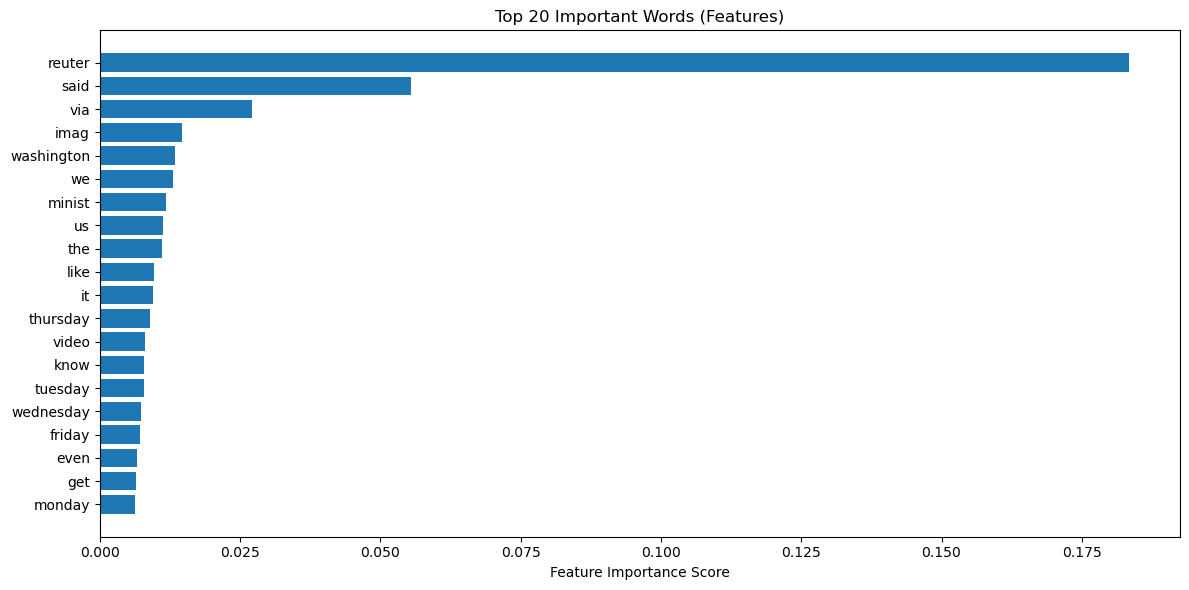

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Get feature names from the TF-IDF vectorizer
feature_names = vectorizer.get_feature_names_out()

# Get feature importances from the Random Forest model
importances = best_rf.feature_importances_

# Get indices of top features
indices = np.argsort(importances)[-20:][::-1]  # Top 20

# Plot
plt.figure(figsize=(12, 6))
plt.title("Top 20 Important Words (Features)")
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.gca().invert_yaxis()
plt.xlabel("Feature Importance Score")
plt.tight_layout()
plt.show()

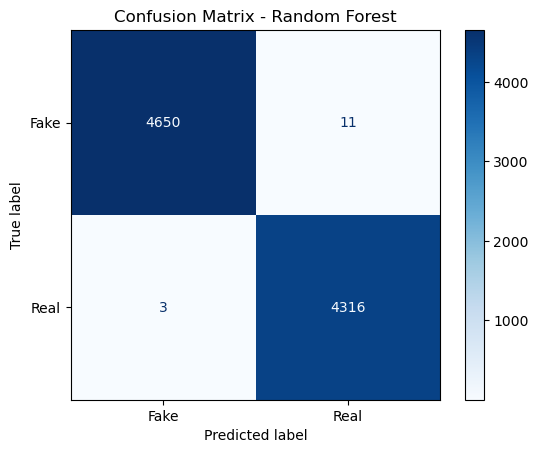

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict using the best model
y_pred_rf = best_rf.predict(X_test)

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fake', 'Real'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.show()

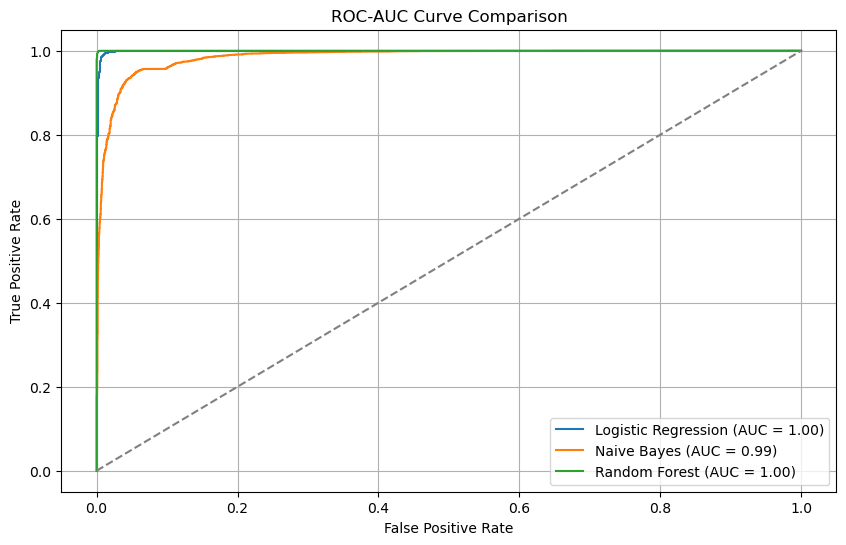

In [25]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
lr_model=model
# Get prediction probabilities
lr_probs = lr_model.predict_proba(X_test)[:, 1]
nb_probs = nb_model.predict_proba(X_test)[:, 1]
rf_probs = rf_model.predict_proba(X_test)[:, 1]

# Get false positive and true positive rates
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)

# Compute AUC scores
lr_auc = auc(lr_fpr, lr_tpr)
nb_auc = auc(nb_fpr, nb_tpr)
rf_auc = auc(rf_fpr, rf_tpr)

# Plot ROC Curves
plt.figure(figsize=(10, 6))
plt.plot(lr_fpr, lr_tpr, label=f"Logistic Regression (AUC = {lr_auc:.2f})")
plt.plot(nb_fpr, nb_tpr, label=f"Naive Bayes (AUC = {nb_auc:.2f})")
plt.plot(rf_fpr, rf_tpr, label=f"Random Forest (AUC = {rf_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve Comparison')
plt.legend()
plt.grid()
plt.show()


In [26]:
import joblib

# Save the trained Random Forest model
joblib.dump(rf_model, 'best_model_random_forest.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')

['vectorizer.pkl']

In [27]:
# To load the saved model later:
# loaded_model = joblib.load('best_model_random_forest.pkl')
# predictions = loaded_model.predict(X_test)